In [1]:
#import libraries

from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
#re-size all the images to this
Image_Size=[224,224]

#train data(images) path
train_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train'

#Test data(images) path
valid_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/test'

In [7]:
mobilenet=MobileNet(input_shape=Image_Size+[3],weights='imagenet',
                  include_top=False)

#dont train existing weights
for layer in mobilenet.layers:
    layer.trainable=False

In [8]:
#Gettig number of classes
folders=glob('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train/*')

In [9]:
len(folders)

10

In [10]:
#our layers - you can add more layer if you want
x=Flatten()(mobilenet.output)

#defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

In [11]:
model=Model(inputs=mobilenet.input,outputs=prediction)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [12]:
#tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
#to perform image augumentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

print()
#testing set
print('Testing length:\n')
test_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Training length:

Found 1163 images belonging to 10 classes.

Testing length:

Found 50 images belonging to 10 classes.


In [15]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=10,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))

Epoch 1/10
37/37 [==============================] - 35s 905ms/step - loss: 5.9633 - accuracy: 0.4841 - val_loss: 1.7860 - val_accuracy: 0.8200
Epoch 2/10
37/37 [==============================] - 33s 907ms/step - loss: 1.6510 - accuracy: 0.8040 - val_loss: 1.5621 - val_accuracy: 0.7600
Epoch 3/10
37/37 [==============================] - 32s 864ms/step - loss: 1.2355 - accuracy: 0.8487 - val_loss: 1.0279 - val_accuracy: 0.8800
Epoch 4/10
37/37 [==============================] - 32s 859ms/step - loss: 0.8789 - accuracy: 0.8899 - val_loss: 1.1969 - val_accuracy: 0.8400
Epoch 5/10
37/37 [==============================] - 31s 847ms/step - loss: 0.5091 - accuracy: 0.9338 - val_loss: 1.6280 - val_accuracy: 0.8000
Epoch 6/10
37/37 [==============================] - 55s 2s/step - loss: 0.5535 - accuracy: 0.9321 - val_loss: 0.7527 - val_accuracy: 0.9000
Epoch 7/10
37/37 [==============================] - 86s 2s/step - loss: 0.2893 - accuracy: 0.9622 - val_loss: 2.3229 - val_accuracy: 0.8600
Epoch

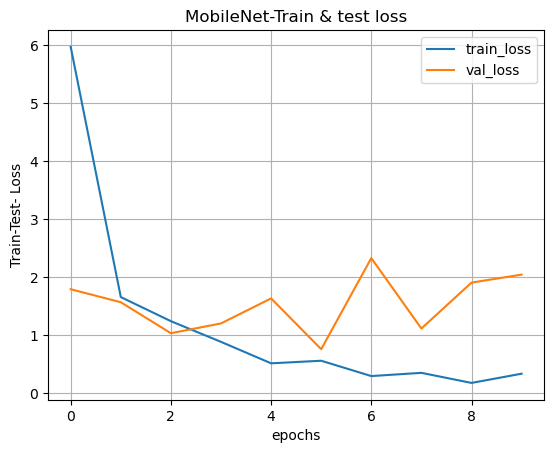

<Figure size 640x480 with 0 Axes>

In [16]:
#loss 
plt.title('MobileNet-Train & test loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--Loss& val loss')

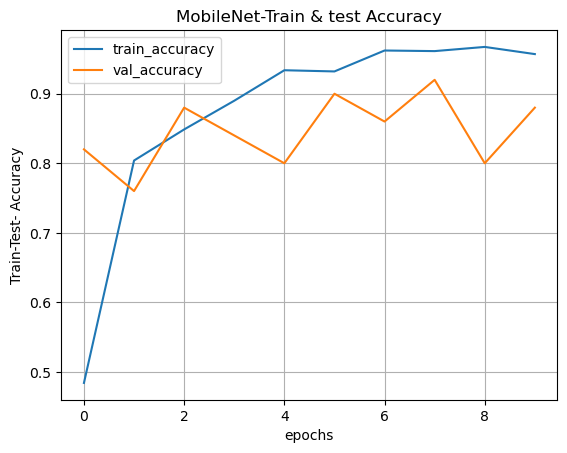

<Figure size 640x480 with 0 Axes>

In [17]:
#loss 
plt.title('MobileNet-Train & test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--Accuracy & val Accuracy')

In [19]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*75)
print('classification report')
print(classification_report(test_set.classes,ypred))
print('='*75)
print('Accuracy score')
print(accuracy_score(test_set.classes,ypred))

2/2 [==============================] - 12s 4s/step
Confusion Matrix
[[1 0 0 1 1 1 1 0 0 0]
 [0 0 1 0 0 1 1 0 2 0]
 [1 0 1 0 0 0 1 0 1 1]
 [0 1 0 1 0 1 1 0 0 1]
 [1 1 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 2 0 0]
 [0 1 0 1 1 0 1 1 0 0]
 [0 0 2 1 0 0 1 0 0 1]
 [0 4 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0]]
classification report
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.00      0.00      0.00         5
           2       0.20      0.20      0.20         5
           3       0.17      0.20      0.18         5
           4       0.20      0.20      0.20         5
           5       0.00      0.00      0.00         5
           6       0.11      0.20      0.14         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5

    accuracy                           0.10        50
   macro avg       0.09      

<Axes: >

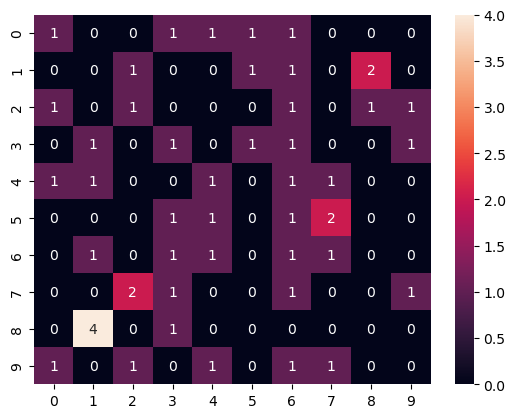

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True)